# Final Project

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import os

# File Path
colab_path = '/content/drive/MyDrive/Econ0150/'
file_path = ''

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir(colab_path + file_path)

Mounted at /content/drive


In [ ]:
spending = pd.read_csv('restorationSpending.csv')
houses = pd.read_csv('housePrices.csv')


In [ ]:
spending_filtered = spending[spending['Year Completed'] >= 2000]
spending_filtered.head()
spending_filtered = spending_filtered[spending_filtered['Adjusted Cost (2024)'] > 0]
spending_filtered.head()
houses_filtered = houses[houses['State'] == 'NJ']
counties = ['Atlantic County', 'Cape May County', 'Ocean County', 'Monmouth County', 'Middlesex County', 'Union County', 'Hudson County', 'Bergen County']
houses_filtered = houses_filtered[houses_filtered['CountyName'].isin(counties)]
houses_filtered
houseList = houses_filtered['RegionName'].unique().tolist()
houseList.sort()

248


In [ ]:
grouped_spending = spending_filtered.groupby('Location')['Adjusted Cost (2024)'].sum().reset_index()


In [ ]:
townNames = {
    'Absecon Island: Atlantic City': 'Atlantic City',
    'Absecon Island: Ventnor': 'Ventnor',
    'Absecon Island: Brigantine Inlet to Great Egg': 'Brigantine',
    'Beach Haven & Holgate Beachfill': 'Beach Haven',
    'Long Beach Island': 'Long Beach Township',
    'Long Beach Island: Beach Haven': 'Beach Haven'
}

grouped_spending['Location'] = grouped_spending['Location'].replace(townNames)
locations = grouped_spending['Location'].tolist()
grouped_spending

,Location,Adjusted Cost (2024)
0,Atlantic City,1.419788e+08
1,Absecon Island: Brigantine Inlet to Great Egg ...,2.761457e+07
2,Ventnor,3.697179e+07
3,Avalon,4.149654e+07
4,Beach Haven,1.603315e+08
5,Brigantine,5.053531e+07
6,Cape May,4.671189e+06
7,Cape May Inlet to Lower Township,8.319964e+07
8,Great Egg Harbor Inlet to Townsends Inlet,7.545600e+07
9,Keansburg,4.938693e+07


**Reasoning**:
To visualize the grouped data, I will use a bar chart to represent the 'Adjusted Cost (2024)' for each 'Location'. I will sort the data to make the visualization more interpretable.



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Long Beach Island: Long Beach, Ship Bottom, Beach Haven, Surf City and Harvey Cedars'),
  Text(1, 0, 'Ocean City'),
  Text(2, 0, 'Beach Haven'),
  Text(3, 0, 'Lavallette'),
  Text(4, 0, 'Atlantic City'),
  Text(5, 0, 'Sandy Hook to Barnegat Inlet: Asbury Park'),
  Text(6, 0, 'Long Beach Island: Surf City'),
  Text(7, 0, 'Strathmere, Sea Isle, Ocean City'),
  Text(8, 0, 'Sandy Hook to Barnegat Inlet: Elberon to Deal'),
  Text(9, 0, 'Cape May Inlet to Lower Township'),
  Text(10, 0, 'Sandy Hook to Barnegat Inlet: Long Branch'),
  Text(11, 0, 'Sandy Hook to Barnegat Inlet: Sea Bright to Monmouth'),
  Text(12, 0, 'Great Egg Harbor Inlet to Townsends Inlet'),
  Text(13, 0, 'Sea Bright to Manasquan'),
  Text(14, 0, 'Ludlum Beach Island: Sea Isle City'

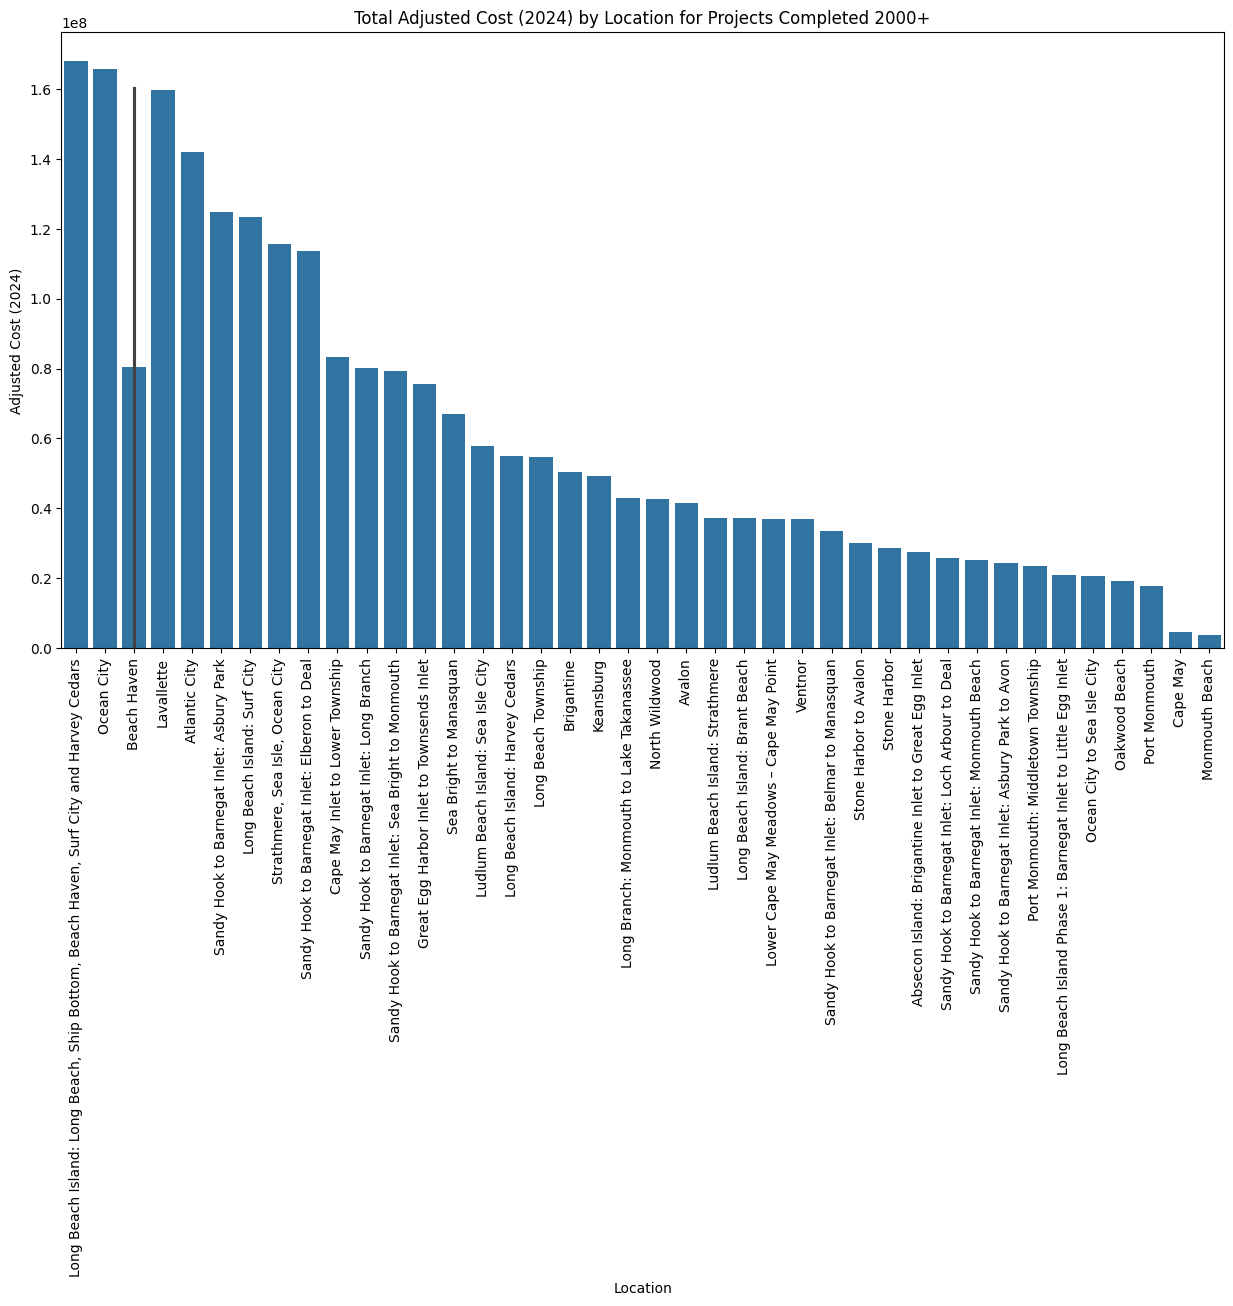

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Adjusted Cost (2024)', data=grouped_spending.sort_values(by='Adjusted Cost (2024)', ascending=False))
# plt.xlabel('Location')
# plt.ylabel('Adjusted Cost (2024)')
plt.title('Total Adjusted Cost (2024) by Location for Projects Completed 2000+')
plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [ ]:
nj_towns = houses_filtered['RegionName'].unique().tolist()
nj_towns.sort()


In [ ]:
nj_towns = houses_filtered['RegionName'].unique().tolist()
nj_towns.sort()
matched_towns_list = []
grouped_spending = grouped_spending.drop(grouped_spending.index[24]).reset_index(drop=True)
for location in grouped_spending['Location']:
    current_matched_towns = []
    for town in nj_towns:
        if location.lower() == town.lower():
            current_matched_towns.append(town)
    matched_towns_list.append(current_matched_towns)
matched_towns_list[1] = ['Brigantine', 'Atlantic City', 'Ventnor City', 'Margate City']
matched_towns_list[2] = ['Ventnor City']
matched_towns_list[7] = ['Cape May']
matched_towns_list[8] = ['Ocean City', 'Strathmere', 'Sea Isle City']
matched_towns_list[12] = ['Long Beach Township', 'Beach Haven', 'Ship Bottom', 'Harvey Cedars', 'Surf City', 'Barnegat Light']
matched_towns_list[14] = ['Long Beach Township']
matched_towns_list[15] = ['Harvey Cedars']
matched_towns_list[16] = ['Long Beach Township', 'Beach Haven', 'Ship Bottom', 'Harvey Cedars', 'Surf City']
matched_towns_list[17] = ['Surf City']
matched_towns_list[18] = ['Long Branch', 'Monmouth Beach']
matched_towns_list[19] = ['Cape May']
matched_towns_list[20] = ['Sea Isle City']
matched_towns_list[21] = ['Strathmere']
matched_towns_list[23] = ['Wildwood']
matched_towns_list[25] = ['Ocean City', 'Strathmere', 'Sea Isle City']
matched_towns_list[27] = ['Port Monmouth']
matched_towns_list[28] = ['Asbury Park']
matched_towns_list[29] = ['Asbury Park']
matched_towns_list[30] = ['Belmar', 'Spring Lake', 'Manasquan']
matched_towns_list[31] = ['Long Branch', 'Deal']
matched_towns_list[32] = ['Loch Arbour', 'Deal']
matched_towns_list[33] = ['Long Branch']
matched_towns_list[34] = ['Monmouth Beach']
matched_towns_list[35] = ['Monmouth Beach', 'Sea Bright']
matched_towns_list[36] = ["Sea Bright","Monmouth Beach","Long Branch","Deal","Loch Arbour","Asbury Park","Belmar","Spring Lake","Manasquan"]
matched_towns_list[38] = ['Stone Harbor', 'Avalon']
matched_towns_list[39] = ['Ocean City', 'Strathmere', 'Sea Isle City']


print(matched_towns_list)
print(grouped_spending['Location'].tolist())
grouped_spending['Matched_Towns'] = matched_towns_list
grouped_spending

[['Atlantic City'], ['Brigantine', 'Atlantic City', 'Ventnor City', 'Margate City'], ['Ventnor City'], ['Avalon'], ['Beach Haven'], ['Brigantine'], ['Cape May'], ['Cape May'], ['Ocean City', 'Strathmere', 'Sea Isle City'], ['Keansburg'], ['Lavallette'], ['Long Beach Township'], ['Long Beach Township', 'Beach Haven', 'Ship Bottom', 'Harvey Cedars', 'Surf City', 'Barnegat Light'], ['Beach Haven'], ['Long Beach Township'], ['Harvey Cedars'], ['Long Beach Township', 'Beach Haven', 'Ship Bottom', 'Harvey Cedars', 'Surf City'], ['Surf City'], ['Long Branch', 'Monmouth Beach'], ['Cape May'], ['Sea Isle City'], ['Strathmere'], ['Monmouth Beach'], ['Wildwood'], ['Ocean City'], ['Ocean City', 'Strathmere', 'Sea Isle City'], ['Port Monmouth'], ['Port Monmouth'], ['Asbury Park'], ['Asbury Park'], ['Belmar', 'Spring Lake', 'Manasquan'], ['Long Branch', 'Deal'], ['Loch Arbour', 'Deal'], ['Long Branch'], ['Monmouth Beach'], ['Monmouth Beach', 'Sea Bright'], ['Sea Bright', 'Monmouth Beach', 'Long Bran

,Location,Adjusted Cost (2024),Matched_Towns
0,Atlantic City,1.419788e+08,[Atlantic City]
1,Absecon Island: Brigantine Inlet to Great Egg ...,2.761457e+07,"[Brigantine, Atlantic City, Ventnor City, Marg..."
2,Ventnor,3.697179e+07,[Ventnor City]
3,Avalon,4.149654e+07,[Avalon]
4,Beach Haven,1.603315e+08,[Beach Haven]
5,Brigantine,5.053531e+07,[Brigantine]
6,Cape May,4.671189e+06,[Cape May]
7,Cape May Inlet to Lower Township,8.319964e+07,[Cape May]
8,Great Egg Harbor Inlet to Townsends Inlet,7.545600e+07,"[Ocean City, Strathmere, Sea Isle City]"
9,Keansburg,4.938693e+07,[Keansburg]


In [ ]:
spentTown = {}
for index, towns in enumerate(matched_towns_list):
    cost = grouped_spending.at[index, "Adjusted Cost (2024)"]
    share = cost / len(towns)

    for t in towns:
        spentTown[t] = spentTown.get(t, 0) + share

spentTown
towns = list(spentTown.keys())
costs = list(spentTown.values())
print(len(towns))
houses_filtered = houses_filtered[houses_filtered['RegionName'].isin(towns)]
houses_filtered = houses_filtered.dropna()
houses_filtered
print(towns)

29
['Atlantic City', 'Brigantine', 'Ventnor City', 'Margate City', 'Avalon', 'Beach Haven', 'Cape May', 'Ocean City', 'Strathmere', 'Sea Isle City', 'Keansburg', 'Lavallette', 'Long Beach Township', 'Ship Bottom', 'Harvey Cedars', 'Surf City', 'Barnegat Light', 'Long Branch', 'Monmouth Beach', 'Wildwood', 'Port Monmouth', 'Asbury Park', 'Belmar', 'Spring Lake', 'Manasquan', 'Deal', 'Loch Arbour', 'Sea Bright', 'Stone Harbor']


In [ ]:

houses_filtered['Percentage Increase (2000-2025)'] = (\
    (houses_filtered['2025-10-31'] - houses_filtered['2000-01-31']) / houses_filtered['2000-01-31']
) * 100
houses_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,Percentage Increase (2000-2025)
1607,10201,1645,Atlantic City,city,NJ,NJ,"Atlantic City-Hammonton, NJ",Atlantic County,59725.678779,59666.759883,...,2.144307e+05,2.142684e+05,2.144023e+05,2.147215e+05,2.151899e+05,2.153620e+05,2.153228e+05,2.149770e+05,2.149054e+05,259.820802
2059,25637,2117,Long Branch,city,NJ,NJ,"New York-Newark-Jersey City, NY-NJ-PA",Monmouth County,180553.777935,181112.285150,...,7.851312e+05,7.851646e+05,7.854664e+05,7.858317e+05,7.859756e+05,7.849599e+05,7.825479e+05,7.806526e+05,7.815186e+05,332.845349
3671,10704,3811,Cape May,city,NJ,NJ,"Ocean City, NJ",Cape May County,158850.582752,159274.318499,...,6.920246e+05,6.906119e+05,6.895955e+05,6.878808e+05,6.874216e+05,6.882426e+05,6.894082e+05,6.919182e+05,6.952357e+05,337.666455
3852,3455,3995,Asbury Park,city,NJ,NJ,"New York-Newark-Jersey City, NY-NJ-PA",Monmouth County,93512.101774,93707.069961,...,6.765784e+05,6.771584e+05,6.770062e+05,6.769486e+05,6.760035e+05,6.730075e+05,6.695869e+05,6.681262e+05,6.700569e+05,616.545669
4476,19171,4640,Manasquan,city,NJ,NJ,"New York-Newark-Jersey City, NY-NJ-PA",Monmouth County,241777.017733,242539.227905,...,1.103022e+06,1.106763e+06,1.110487e+06,1.112605e+06,1.111122e+06,1.107777e+06,1.104454e+06,1.106804e+06,1.115541e+06,361.392470
4494,27950,4658,Wildwood,city,NJ,NJ,"Ocean City, NJ",Cape May County,105171.064857,105629.311852,...,5.889046e+05,5.900981e+05,5.902839e+05,5.894549e+05,5.897607e+05,5.914115e+05,5.950327e+05,6.000792e+05,6.053892e+05,475.623328
5500,15845,5716,Ocean City,city,NJ,NJ,"Ocean City, NJ",Cape May County,246492.351935,248506.687989,...,1.059252e+06,1.062477e+06,1.059348e+06,1.052801e+06,1.046156e+06,1.042736e+06,1.043084e+06,1.047121e+06,1.055359e+06,328.150640
5700,22671,5929,Ventnor City,city,NJ,NJ,"Atlantic City-Hammonton, NJ",Atlantic County,139541.597921,139975.295991,...,5.903430e+05,5.940445e+05,5.950670e+05,5.958500e+05,5.962132e+05,5.964243e+05,5.962291e+05,5.979121e+05,6.042512e+05,333.025849
6123,41023,6373,Spring Lake,city,NJ,NJ,"New York-Newark-Jersey City, NY-NJ-PA",Monmouth County,315372.312671,316857.875264,...,1.281530e+06,1.289329e+06,1.297706e+06,1.305901e+06,1.311328e+06,1.318099e+06,1.326294e+06,1.340898e+06,1.361188e+06,331.613071
6170,12166,6426,Keansburg,city,NJ,NJ,"New York-Newark-Jersey City, NY-NJ-PA",Monmouth County,88156.542126,88174.503588,...,3.731684e+05,3.717529e+05,3.710685e+05,3.710865e+05,3.719307e+05,3.722164e+05,3.721930e+05,3.729983e+05,3.756188e+05,326.081620


In [ ]:
beach_lengths_miles = {
    "Atlantic City": 4.09,
    "Brigantine": 6.03,
    "Ventnor City": 1.84,
    "Margate City": 1.57,
    "Avalon": 3.99,
    "Beach Haven": 1.90,
    "Cape May": 1.52,
    "Ocean City": 8.12,
    "Strathmere": 2.15,
    "Sea Isle City": 5.05,
    "Keansburg": 1.40,
    "Lavallette": 0.93,
    "Long Beach Township": 3.55,
    "Ship Bottom": 1.27,
    "Harvey Cedars": 1.31,
    "Surf City": 1.30,
    "Barnegat Light": 1.05,
    "Long Branch": 0.51,
    "Monmouth Beach": 0.56,
    "Wildwood": 2.10,
    "Port Monmouth": 1.10,
    "Asbury Park": 0.48,
    "Belmar": 0.88,
    "Spring Lake": 0.84,
    "Manasquan": 0.69,
    "Deal": 0.42,
    "Loch Arbour": 0.25,
    "Sea Bright": 0.62,
    "Stone Harbor": 2.54
}


**Reasoning**:
Convert the `spentTown` dictionary into a pandas DataFrame with 'RegionName' and 'Spending' columns, and then display the head of the new DataFrame to verify its structure and content.



In [ ]:
all = beach_lengths_miles.items()
for (k, v) in all:
  spentTown[k] = spentTown.get(k)/v
spent_df = pd.DataFrame(list(spentTown.items()), columns=['RegionName', 'Spending Per Mile'])
display(spent_df.head())

,RegionName,Spending Per Mile
0,Atlantic City,3.640158e+07
1,Brigantine,9.525532e+06
2,Ventnor City,2.384534e+07
3,Margate City,4.397225e+06
4,Avalon,1.416904e+07


In [ ]:
merged_df = pd.merge(houses_filtered[['RegionName', 'Percentage Increase (2000-2025)']], spent_df, on='RegionName', how='inner')
display(merged_df.head())

,RegionName,Percentage Increase (2000-2025),Spending Per Mile
0,Atlantic City,259.820802,3.640158e+07
1,Long Branch,332.845349,3.253833e+08
2,Cape May,337.666455,8.214983e+07
3,Asbury Park,616.545669,3.261674e+08
4,Manasquan,361.392470,2.699278e+07


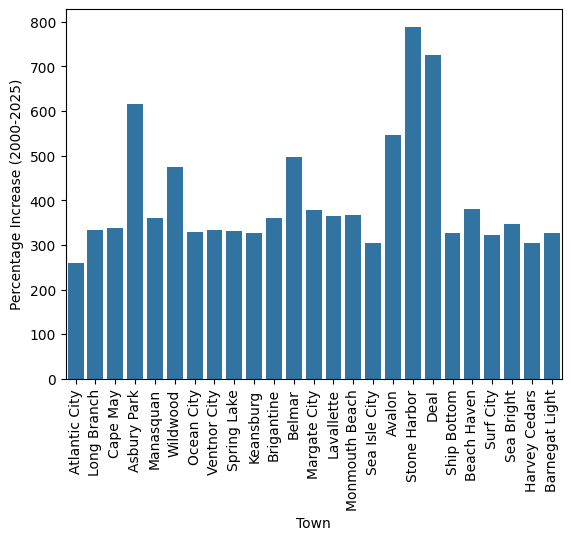

In [ ]:
sns.barplot(x='RegionName', y='Percentage Increase (2000-2025)', data=merged_df)
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.show()

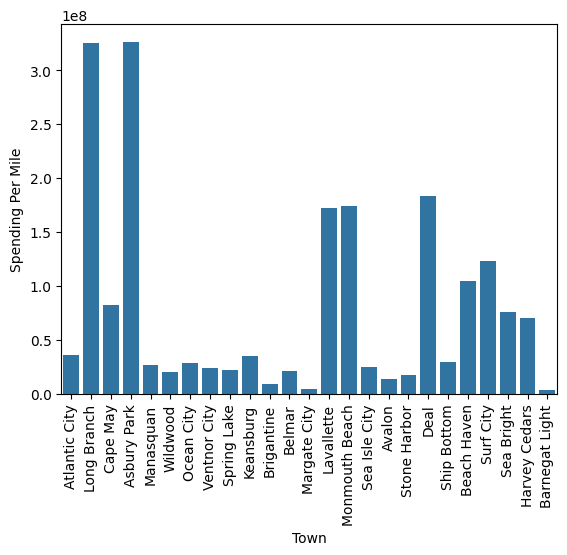

In [ ]:
sns.barplot(x='RegionName', y='Spending Per Mile', data=merged_df)
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.show()

                                     OLS Regression Results                                     
Dep. Variable:     Q("Percentage Increase (2000-2025)")   R-squared:                       0.039
Model:                                              OLS   Adj. R-squared:                 -0.003
Method:                                   Least Squares   F-statistic:                    0.9369
Date:                                  Mon, 08 Dec 2025   Prob (F-statistic):              0.343
Time:                                          10:18:31   Log-Likelihood:                -156.95
No. Observations:                                    25   AIC:                             317.9
Df Residuals:                                        23   BIC:                             320.3
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                             c

<Axes: xlabel='Spending Per Mile', ylabel='Percentage Increase (2000-2025)'>

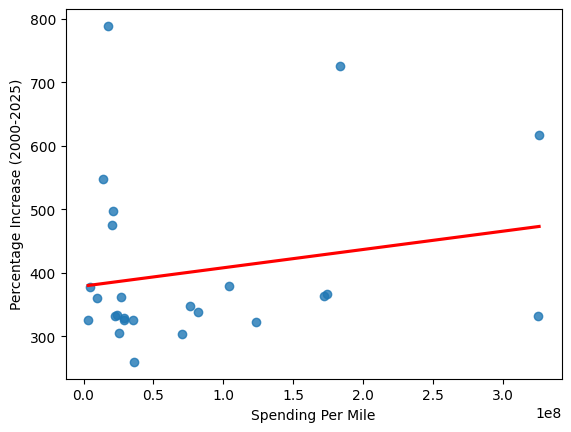

In [ ]:
print(smf.ols('Q("Percentage Increase (2000-2025)") ~ Q("Spending Per Mile")', data=merged_df).fit().summary())
sns.regplot(data=merged_df, x='Spending Per Mile', y='Percentage Increase (2000-2025)', ci=None, line_kws={'color':'red'})

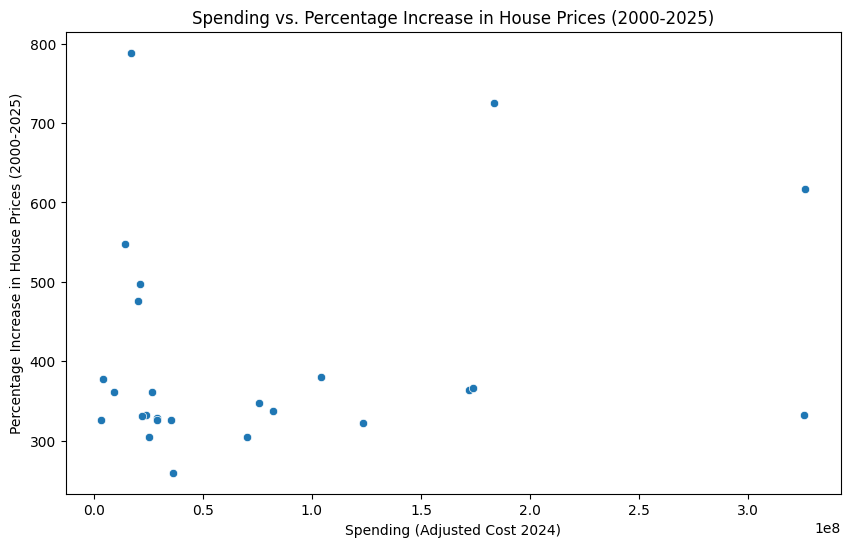

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending Per Mile', y='Percentage Increase (2000-2025)', data=merged_df)
plt.title('Spending vs. Percentage Increase in House Prices (2000-2025)')
plt.xlabel('Spending (Adjusted Cost 2024)')
plt.ylabel('Percentage Increase in House Prices (2000-2025)')
plt.show()